In [2]:
!pip install torch torchvision
!pip install transformers

  Attempting uninstall: fsspec
    Found existing installation: fsspec 2021.10.1
    Uninstalling fsspec-2021.10.1:
      Successfully uninstalled fsspec-2021.10.1


In [27]:
import os
import torch
import pandas as pd
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image_directory = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Pics - Testing"


def load_images_from_directory(directory):
    images = []
    image_names = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            images.append(img)
            image_names.append(filename)
    return images, image_names

c:\Users\tokud\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [3]:
images, image_names = load_images_from_directory(image_directory)

inputs = processor(images=images, return_tensors="pt", padding=True)

with torch.no_grad():
    image_features = model.get_image_features(**inputs)

image_features /= image_features.norm(dim=-1, keepdim=True)

print(f"Extracted features for {len(images)} images.")

Extracted features for 100 images.


In [4]:
from sklearn.cluster import KMeans
import numpy as np

image_features_np = image_features.cpu().numpy()

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(image_features_np)

for idx, label in enumerate(kmeans.labels_):
    print(f"Image {image_names[idx]} is in cluster {label}")


Image -_82b4r1oFF68VGzdG5kAw.jpg is in cluster 4
Image -_8iUXhThD_VobTagop6AA.jpg is in cluster 4
Image -__4fB3-t0HUSOHb0lHZGA.jpg is in cluster 1
Image -__DdEVsZPQkwqHgAoZOOg.jpg is in cluster 2
Image _-7d67N8E6hFcywf1_uoHw.jpg is in cluster 1
Image _0-b8iwv85pOP-9kvByQ6A.jpg is in cluster 1
Image _06w5Yq2UXOTr7NLnxG-xA.jpg is in cluster 0
Image _0cYtdCQiiPUOMyVhmQExw.jpg is in cluster 1
Image _0dvZHaTGJWJNpRD5LOkDw.jpg is in cluster 0
Image _0ee3H6AP0W85VBOUiwWsQ.jpg is in cluster 2
Image _0fOPZ2fUvQsva85t4aIMw.jpg is in cluster 0
Image _0Pp__y-GjoBLiLuLmRCLA.jpg is in cluster 4
Image _0r8MVo8xNBaoIuCDLJHQw.jpg is in cluster 3
Image _0SBFKuHHPOmyY-Jiq-J3Q.jpg is in cluster 1
Image _0tUiQjqp3NVJ7_2FAP6gQ.jpg is in cluster 4
Image _0vAkAeeAMg9yrq06EzNCg.jpg is in cluster 2
Image _0Y-W5tvW3zcFb1JkOSFAA.jpg is in cluster 0
Image _13UMjej1f5v3G7mqv5oTg.jpg is in cluster 2
Image _1gc3_o5AjCRkM7d9kfyUw.jpg is in cluster 1
Image _1iTcUhYsR6v4lu5P_CzkA.jpg is in cluster 2
Image _1mY3YC4DL9Eaj

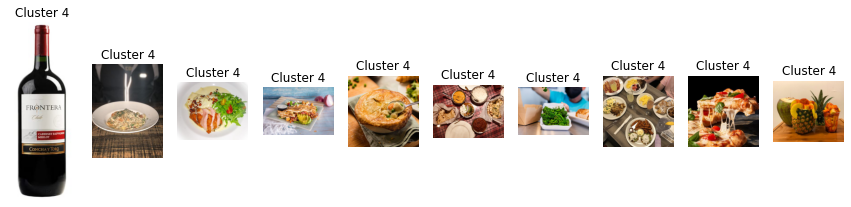

In [26]:
def display_cluster_images(cluster_label, n_images=10):
    cluster_indices = [i for i, label in enumerate(kmeans.labels_) if label == cluster_label]
    
    if len(cluster_indices) > n_images:
        cluster_indices = cluster_indices[:n_images]
    
    fig, axs = plt.subplots(1, n_images, figsize=(15, 5))
    for i, idx in enumerate(cluster_indices):
        img = images[idx]
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"Cluster {cluster_label}")
    plt.show()


display_cluster_images(4, n_images=10)


In [5]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} images")


Cluster 0: 17 images
Cluster 1: 27 images
Cluster 2: 21 images
Cluster 3: 10 images
Cluster 4: 25 images


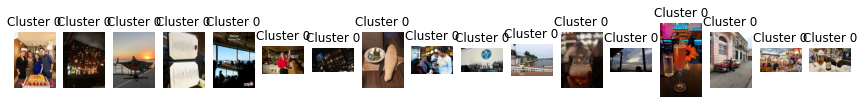

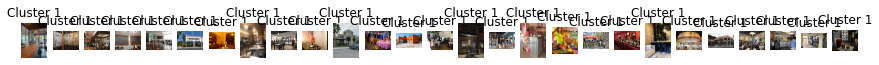

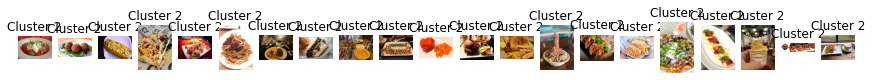

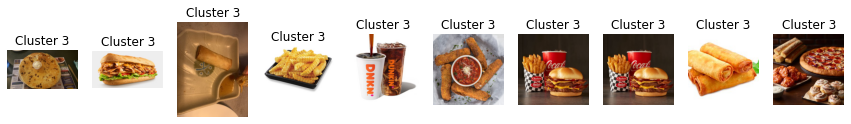

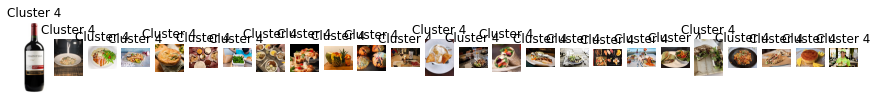

In [8]:
for cluster, count in zip(unique, counts):
    display_cluster_images(cluster, n_images=count)

In [13]:
image_paths = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith('.jpg')]
print(image_paths[:5])

['C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Pics - Testing\\-_82b4r1oFF68VGzdG5kAw.jpg', 'C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Pics - Testing\\-_8iUXhThD_VobTagop6AA.jpg', 'C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Pics - Testing\\-__4fB3-t0HUSOHb0lHZGA.jpg', 'C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Pics - Testing\\-__DdEVsZPQkwqHgAoZOOg.jpg', 'C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/Florida Pics - Testing\\_-7d67N8E6hFcywf1_uoHw.jpg']


In [14]:

texts = [
    "A luxurious fine dining restaurant with white tablecloths and elegant lighting.",
    "A fancy restaurant with gourmet meals and expensive decor.",
    "A five-star restaurant with upscale ambiance.",
    "A fast food restaurant with quick service and casual seating.",
    "A chain restaurant with a bright logo and plastic seating.",
    "A burger restaurant with self-service counters."
]


text_inputs = processor(text=texts, return_tensors="pt", padding=True)
with torch.no_grad():
    text_features = model.get_text_features(**text_inputs)


text_features /= text_features.norm(dim=-1, keepdim=True)

fine_dining_images = []
fast_food_images = []

for idx, img_feature in enumerate(image_features):
    similarity = torch.matmul(img_feature.unsqueeze(0), text_features.T)
    best_match = similarity.argmax().item()
    print(f"Image {image_names[idx]} best matches text: '{texts[best_match]}'")
    
    if best_match in [0, 1, 2]:
        fine_dining_images.append(image_paths[idx])
        
    if best_match in [3, 4, 5]:
        fast_food_images.append(image_paths[idx])


Image -_82b4r1oFF68VGzdG5kAw.jpg best matches text: 'A luxurious fine dining restaurant with white tablecloths and elegant lighting.'
Image -_8iUXhThD_VobTagop6AA.jpg best matches text: 'A five-star restaurant with upscale ambiance.'
Image -__4fB3-t0HUSOHb0lHZGA.jpg best matches text: 'A fast food restaurant with quick service and casual seating.'
Image -__DdEVsZPQkwqHgAoZOOg.jpg best matches text: 'A five-star restaurant with upscale ambiance.'
Image _-7d67N8E6hFcywf1_uoHw.jpg best matches text: 'A five-star restaurant with upscale ambiance.'
Image _0-b8iwv85pOP-9kvByQ6A.jpg best matches text: 'A fast food restaurant with quick service and casual seating.'
Image _06w5Yq2UXOTr7NLnxG-xA.jpg best matches text: 'A fancy restaurant with gourmet meals and expensive decor.'
Image _0cYtdCQiiPUOMyVhmQExw.jpg best matches text: 'A burger restaurant with self-service counters.'
Image _0dvZHaTGJWJNpRD5LOkDw.jpg best matches text: 'A five-star restaurant with upscale ambiance.'
Image _0ee3H6AP0W85

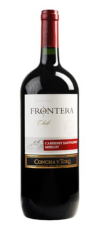

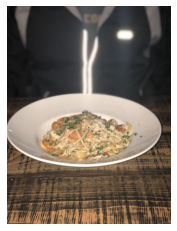

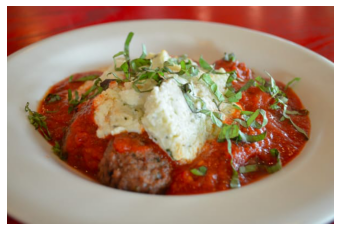

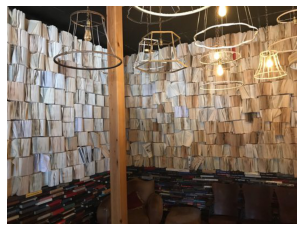

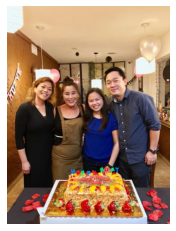

In [15]:
n_images_to_display = 5
for i in range(min(len(fine_dining_images), n_images_to_display)):
    img = Image.open(fine_dining_images[i])
    plt.imshow(img)
    plt.axis('off')
    plt.show()

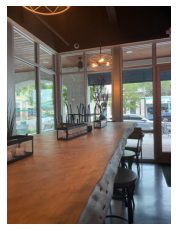

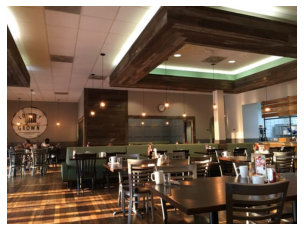

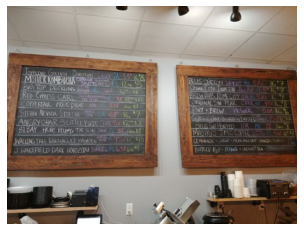

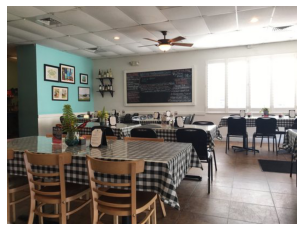

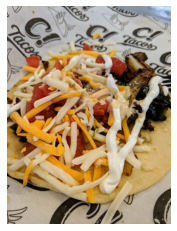

In [16]:
n_images_to_display = 5
for i in range(min(len(fast_food_images), n_images_to_display)):
    img = Image.open(fast_food_images[i])
    plt.imshow(img)
    plt.axis('off')
    plt.show()